##  1. Correlation and Autocorrelation


### A "Thin" Application of Time Series

In [1]:
# Import pandas and plotting modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# # Convert the date index to datetime
# diet.index = pd.to_datetime(diet.index)


# # Slice the dataset to keep only 2012
# diet2012 = diet['2012']

# # Plot 2012 data
# diet2012.plot(grid=True)
# plt.show()

### Merging Time Series With Different Dates

In [2]:
# # Import pandas
# import pandas as pd

# # Convert the stock index and bond index into sets
# set_stock_dates = set(stocks.index)
# set_bond_dates = set(bonds.index)

# # Take the difference between the sets and print
# print(set_stock_dates - set_bond_dates)

# # Merge stocks and bonds DataFrames using join()
# stocks_and_bonds = stocks.join(bonds, how='inner')

### Correlation of Stocks and Bonds

In [3]:
# # Compute percent change using pct_change()
# returns = stocks_and_bonds.pct_change()
# print(returns.head())
# # Compute correlation using corr()
# correlation = returns['SP500'].corr(returns['US10Y'])
# print("Correlation of stocks and interest rates: ", correlation)

# # Make scatter plot
# plt.scatter(x=returns['SP500'], y=returns['US10Y'])
# plt.show()

### Flying Saucers Aren't Correlated to Flying Markets

In [4]:
# # Compute correlation of levels
# correlation1 = levels['DJI'].corr(levels['UFO'])
# print("Correlation of levels: ", correlation1)

# # Compute correlation of percent changes
# changes = levels.pct_change()
# correlation2 = changes['DJI'].corr(changes['UFO'])
# print("Correlation of changes: ", correlation2)

### Looking at a Regression's R-Squared

In [5]:
# # Import the statsmodels module
# import statsmodels.api as sm

# # Compute correlation of x and y
# correlation = x.corr(y)
# print("The correlation between x and y is %4.2f" %(correlation))

# # Convert the Series x to a DataFrame and name the column x
# dfx = pd.DataFrame(x, columns=['x'])

# # Add a constant to the DataFrame dfx
# dfx1 = sm.add_constant(dfx)

# # Regress y on dfx1
# result = sm.OLS(y, dfx1).fit()

# # Print out the results and look at the relationship between R-squared and the correlation above
# print(result.summary())

### A Popular Strategy Using Autocorrelation

In [6]:
MSFT = pd.read_csv('data/MSFT.csv', parse_dates=['Date'], index_col='Date')

# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


### Are Interest Rates Autocorrelated?

In [7]:
# # Compute the daily change in interest rates 
# daily_diff = daily_rates.diff()
# print(daily_diff.head())
# # Compute and print the autocorrelation of daily changes
# autocorrelation_daily = daily_diff['US10Y'].autocorr()
# print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# # Convert the daily data to annual data
# yearly_rates = daily_rates.resample(rule='A').last()
# print(yearly_rates.head())
# # Repeat above for annual data
# yearly_diff = yearly_rates.diff()
# autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
# print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

## 2. Some Simple Time Series

### Taxing Exercise: Compute the ACF

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


/Users/huiren/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


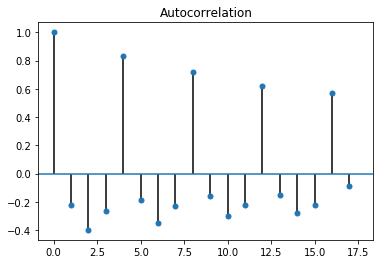

In [8]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB = pd.read_csv('data/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

### Are We Confident This Stock is Mean Reverting?

In [9]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)


The autocorrelation of weekly MSFT returns is -0.16


### Can't Forecast White Noise

The mean is 0.020 and the standard deviation is 0.051


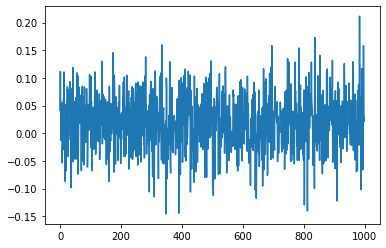

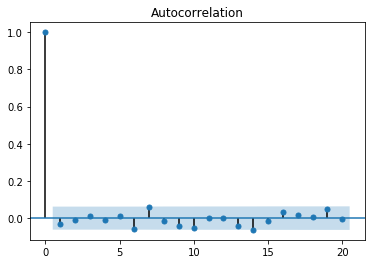

In [10]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

### Generate a Random Walk

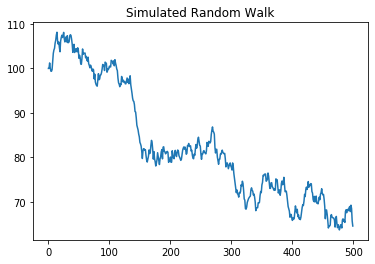

In [11]:
import numpy as np

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the Drift

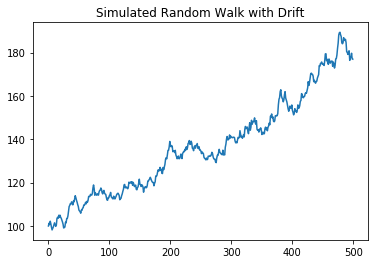

In [12]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### Are Stock Prices a Random Walk?

In [13]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

AMZN = pd.read_csv('data/AMZN.csv', parse_dates=['Date'], index_col='Date')

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770742, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


### How About Stock Returns?

In [14]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808344604e-22


### Seasonal Adjustment During Tax Season

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


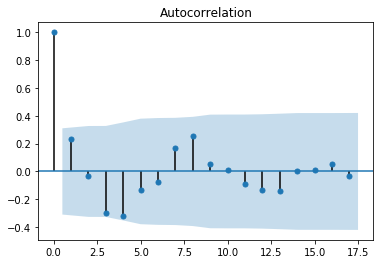

In [15]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

## 3. Autoregressive (AR) Models


### Simulate AR(1) Time Series

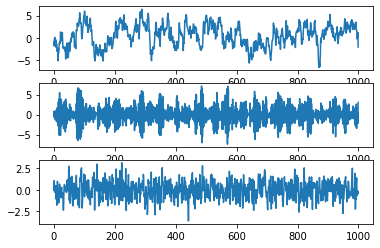

In [16]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(3,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(3,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

# Plot 3: AR parameter = +0.3
plt.subplot(3,1,3)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

### Compare the ACF for Several AR Time Series

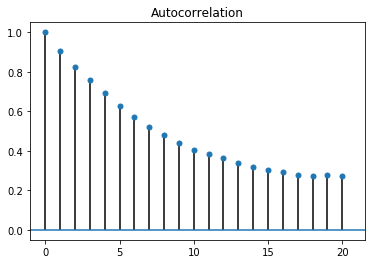

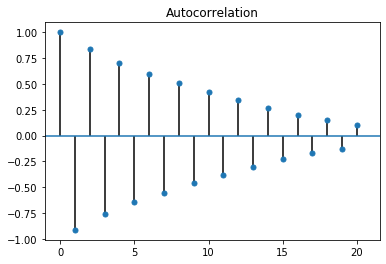

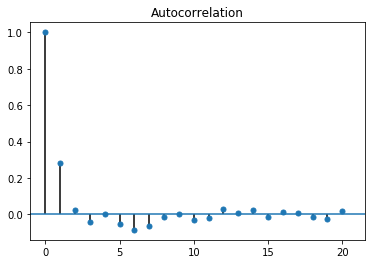

In [17]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

### Estimating an AR Model

In [18]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1423.088
Method:                       css-mle   S.D. of innovations              1.003
Date:                Wed, 06 May 2020   AIC                           2852.175
Time:                        17:08:56   BIC                           2866.899
Sample:                             0   HQIC                          2857.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4562      0.341      1.339      0.181      -0.212       1.124
ar.L1.y        0.9078      0.013     68.812      0.000       0.882       0.934
                                    Roots           

### Forecasting with an AR Model

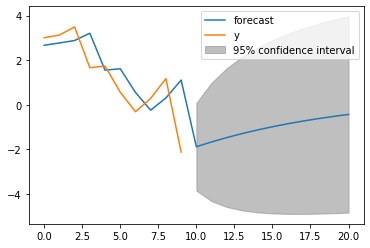

In [19]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Let's Forecast Interest Rates

In [20]:
# # Import the ARMA module from statsmodels
# from statsmodels.tsa.arima_model import ARMA

# # Forecast interest rates using an AR(1) model
# mod = ARMA(interest_rate_data, order=(1,0))
# res = mod.fit()

# # Plot the original series and the forecasted series
# res.plot_predict(start=0, end='2022')
# plt.legend(fontsize=8)
# plt.show()

### Compare AR Model with Random Walk

In [21]:
# # Import the plot_acf module from statsmodels
# from statsmodels.graphics.tsaplots import plot_acf

# # Plot the interest rate series and the simulated random walk series side-by-side
# fig, axes = plt.subplots(2,1)

# # Plot the autocorrelation of the interest rate series in the top plot
# fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# # Plot the autocorrelation of the simulated random walk series in the bottom plot
# fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# # Label axes
# axes[0].set_title("Interest Rate Data")
# axes[1].set_title("Simulated Random Walk Data")
# plt.show()

### Estimate Order of Model: PACF

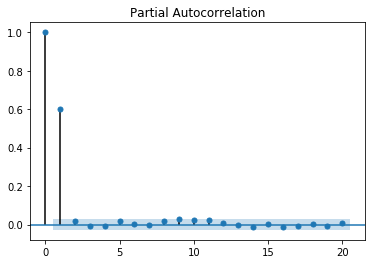

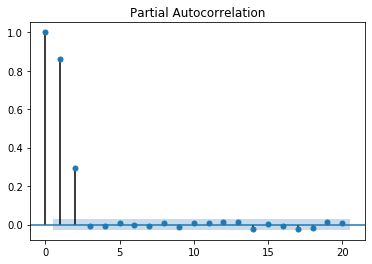

In [22]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### Estimate Order of Model: Information Criteria

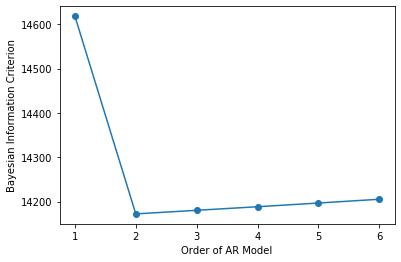

In [23]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

## 4. Moving Average (MA) and ARMA Models

### Simulate MA(1) Time Series

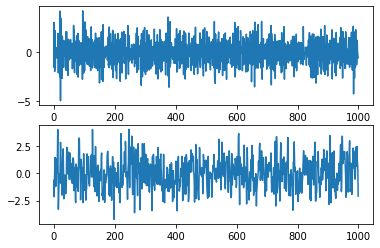

In [24]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1,0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

### Compute the ACF for Several MA Time Series

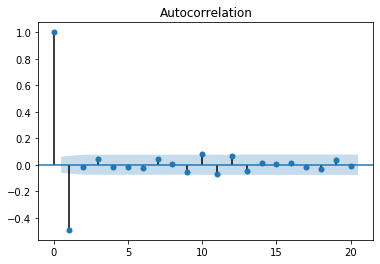

In [25]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

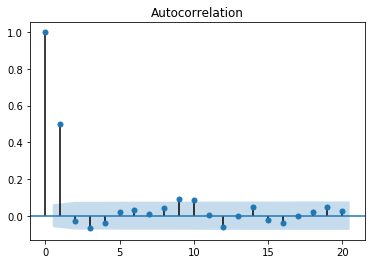

In [26]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

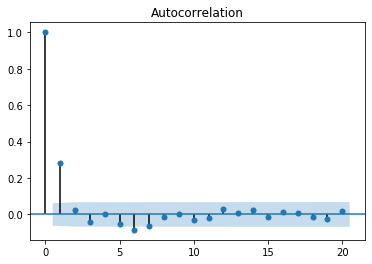

In [27]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

### Estimating an MA Model

In [28]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0, 1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.019
Method:                       css-mle   S.D. of innovations              0.985
Date:                Wed, 06 May 2020   AIC                           2816.037
Time:                        17:08:59   BIC                           2830.760
Sample:                             0   HQIC                          2821.633
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.003     -0.116      0.908      -0.005       0.005
ma.L1.y       -0.9206      0.013    -69.178      0.000      -0.947      -0.894
                                    Roots           

### Forecasting with MA Model

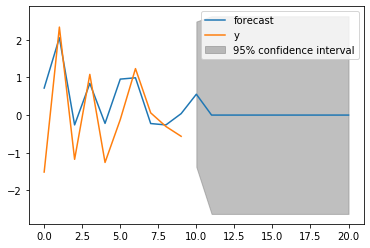

In [29]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### High Frequency Stock Prices

In [30]:
# import datetime module
import datetime

intraday = pd.read_table('data/Sprint_intraday.txt', header=None, delimiter=',')

intraday.drop(columns=[2,3,4,5], inplace=True)

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


### More Data Cleaning: Missing Data

In [31]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [32]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


In [33]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

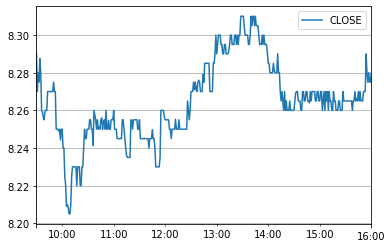

In [34]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### Applying an MA Model



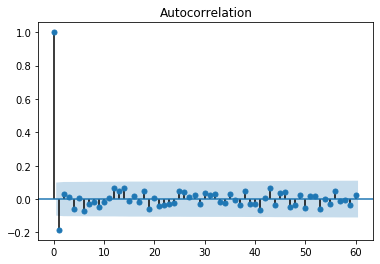

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [35]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

### Equivalence of AR(1) and MA(infinity)

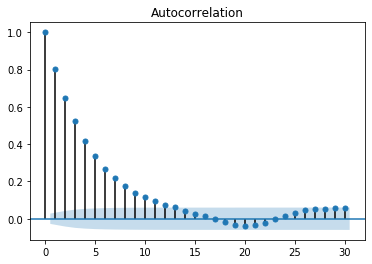

In [36]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

## 5. Putting It All Together

### A Dog on a Leash? (Part 1)

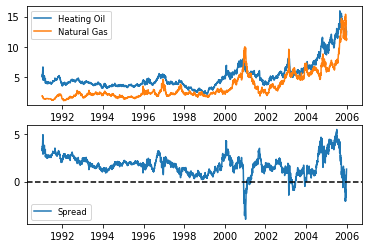

In [37]:
HO = pd.read_csv('data/CME_HO1.csv', parse_dates=['Date'], index_col='Date')

NG = pd.read_csv('data/CME_NG1.csv', parse_dates=['Date'], index_col='Date')

# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

### A Dog on a Leash? (Part 2)

In [38]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.019831028071626525
The p-value for the ADF test on NG is  0.0045472849565425365
The p-value for the ADF test on the spread is  0.00011887051827352973


### Are Bitcoin and Ethereum Cointegrated?

In [39]:
# # Import the statsmodels module for regression and the adfuller function
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller

# # Regress BTC on ETH
# ETH = sm.add_constant(ETH)
# result = sm.OLS(BTC, ETH).fit()

# # Compute ADF
# b = result.params[1]
# adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
# print("The p-value for the ADF test is ", adf_stats[1])

### Is Temperature a Random Walk (with Drift)?

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
temp_NY = pd.read_csv('NOAA_TAVG.csv', parse_dates=['DATE'], index_col='DATE')
temp_NY.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


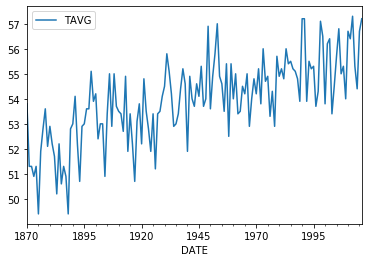

The p-value for the ADF test is  0.583293898787111


In [42]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

### Getting "Warmed" Up: Look at Autocorrelations

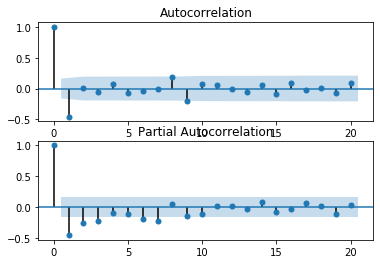

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

### Which ARMA Model is Best?

In [44]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

/Users/huiren/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/huiren/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/huiren/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.534689831391
The AIC for an AR(2) is:  501.9274123160227
The AIC for an ARMA(1,1) is:  469.07291175011204


### Don't Throw Out That Winter Coat Yet

/Users/huiren/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/huiren/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


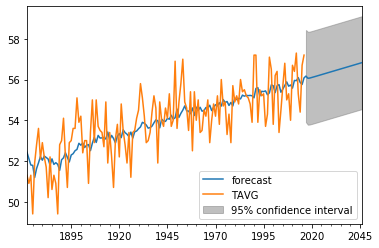

In [45]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()